In [1]:
import os.path as op
import shutil

import mne
from mne_bids import (BIDSPath, write_raw_bids, read_raw_bids,
                      inspect_dataset, mark_channels)


In [6]:
raw2 = mne.io.read_raw_fif('/home/is153802/workspace_LPP/data/MEG/LPP/raw/fr_190151/190715/fr_r1_raw.fif')


Opening raw data file /home/is153802/workspace_LPP/data/MEG/LPP/raw/fr_190151/190715/fr_r1_raw.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle


ValueError: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data. Use allow_maxshield=True if you are sure you want to load the data despite this warning.

In [7]:
raw_stat = mne.io.read_raw_fif('/home/is153802/workspace_LPP/data/MEG/LPP/alternative_bids/sub-180131/ses-0/meg/sub-180131_ses-0_task-0_run-01_meg.fif',allow_maxshield=True)

Opening raw data file /home/is153802/workspace_LPP/data/MEG/LPP/alternative_bids/sub-180131/ses-0/meg/sub-180131_ses-0_task-0_run-01_meg.fif...
Isotrak not found
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 934000 ... 1575999 =    934.000 ...  1575.999 secs
Ready.


/tmp/ipykernel_239434/2212716414.py:1: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw_stat = mne.io.read_raw_fif('/home/is153802/workspace_LPP/data/MEG/LPP/alternative_bids/sub-180131/ses-0/meg/sub-180131_ses-0_task-0_run-01_meg.fif',allow_maxshield=True)


In [8]:
raw_stat.info

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, MEG0132, ...
 chs: 204 Gradiometers, 102 Magnetometers, 5 Stimulus, 64 EEG, 17 misc
 custom_ref_applied: False
 description: MEG user (meg) Vectorview system
 events: 1 item (list)
 experimenter: Common
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_subsystem: 3 items (dict)
 line_freq: 50.0
 lowpass: 330.0 Hz
 maxshield: True
 meas_date: 2018-01-31 13:39:43 UTC
 meas_id: 4 items (dict)
 nchan: 392
 proc_history: 1 item (list)
 proj_id: 1 item (ndarray)
 proj_name: petit_prince
 projs: grad_ssp_upright.fif : PCA-v1: off, grad_ssp_upright.fif : ...
 sfreq: 1000.0 Hz
 subject_info: 6 items (dict)
>

In [10]:
from mne.preprocessing import maxwell_filter
path_cal = '/home/is153802/workspace_LPP/data/MEG/LPP/MEG_cal_files/sss_cal_nsp_2017.dat'
raw_sss = maxwell_filter(raw_stat,calibration = path_cal)



Maxwell filtering raw data


RuntimeError: coord_frame cannot be "head" because info["dev_head_t"] is None; if this is an empty room recording, consider using coord_frame="meg"

In [2]:
bids_root = '/home/is153802/workspace_LPP/data/MEG/LPP/LPP_bids'


# print_dir_tree(bids_root)

# print(make_report(bids_root))

datatype = 'meg'
session = '01'
run = '01'
task = 'rest'
suffix = 'meg'
subject = '220707'
bids_path = BIDSPath(root=bids_root, subject=subject,suffix = suffix, task=task,run=run,
                     session=session, datatype=datatype)



[BIDSPath(
root: /home/is153802/workspace_LPP/data/MEG/LPP/LPP_bids
datatype: meg
basename: sub-220707_ses-01_task-rest_run-01_meg.fif)]
/home/is153802/workspace_LPP/data/MEG/LPP/LPP_bids/sub-220707/ses-01/meg/sub-220707_ses-01_task-rest_run-01_meg.fif


BIDSPath(
root: /home/is153802/workspace_LPP/data/MEG/LPP/LPP_bids
datatype: meg
basename: sub-220707_ses-01_task-rest_run-01_meg)

Reading 0 ... 632999  =      0.000 ...   632.999 secs...
Finding segments below or above PTP threshold.


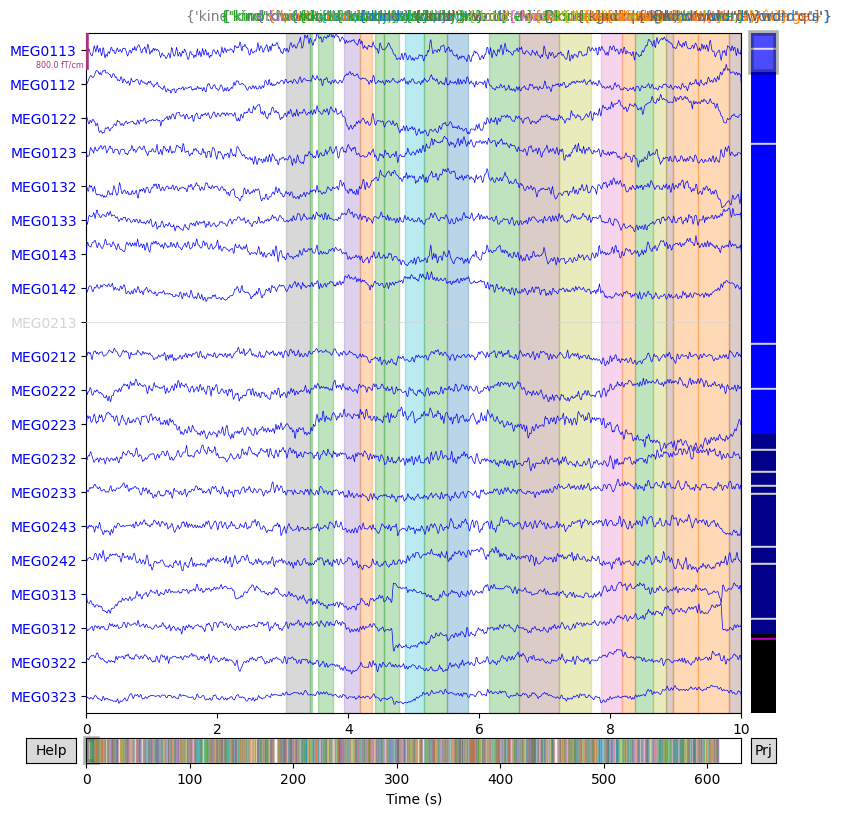

In [11]:
# 
inspect_dataset(bids_path, l_freq=0.1, h_freq=30.)

Using matplotlib as 2D backend.


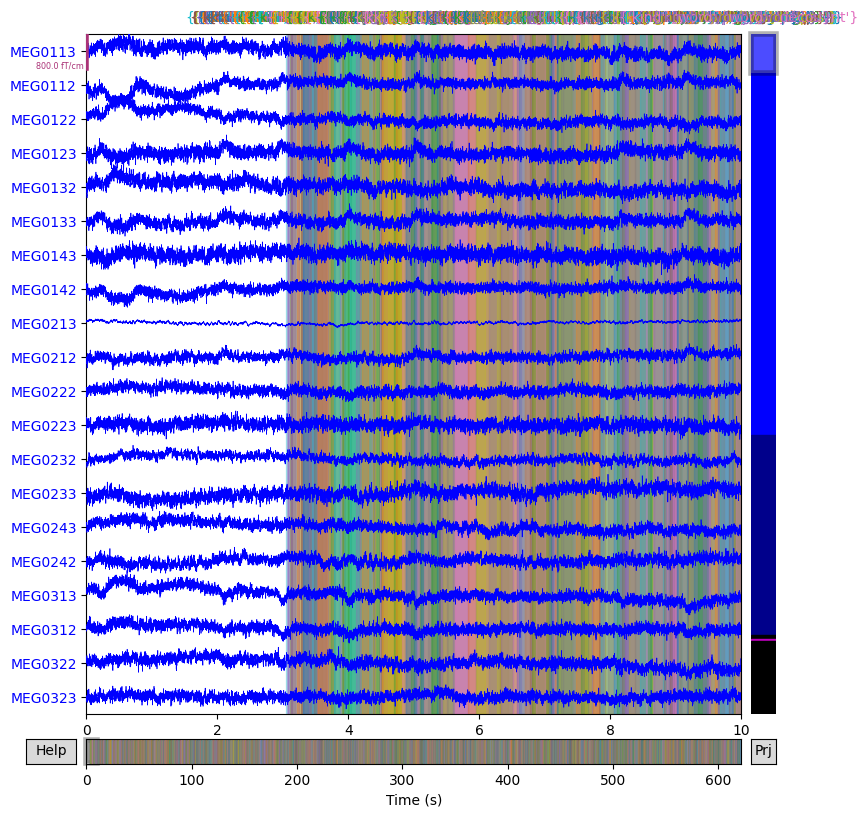

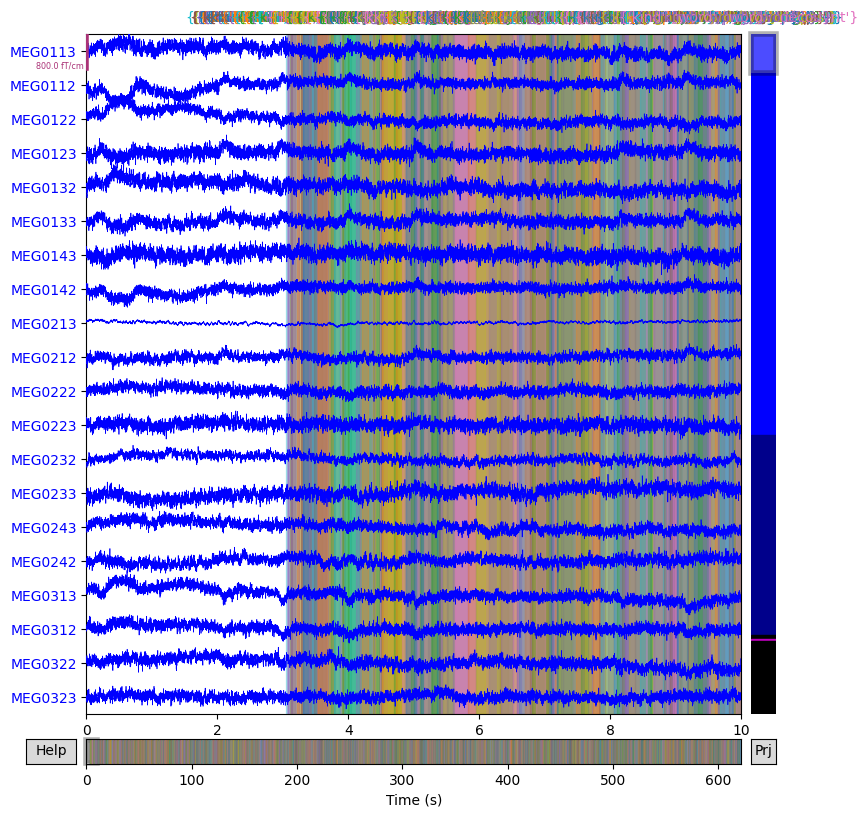

In [7]:
raw.plot()


Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


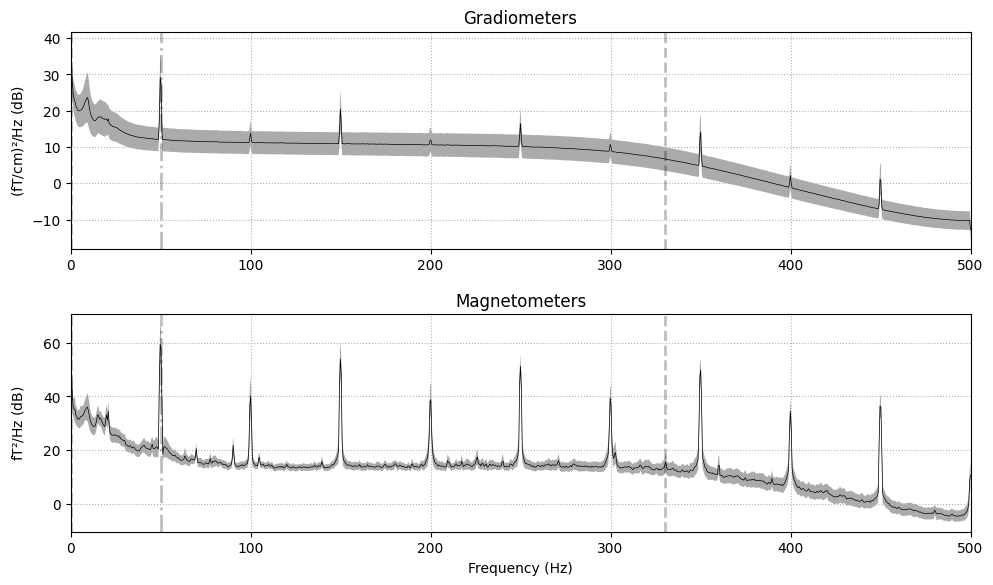

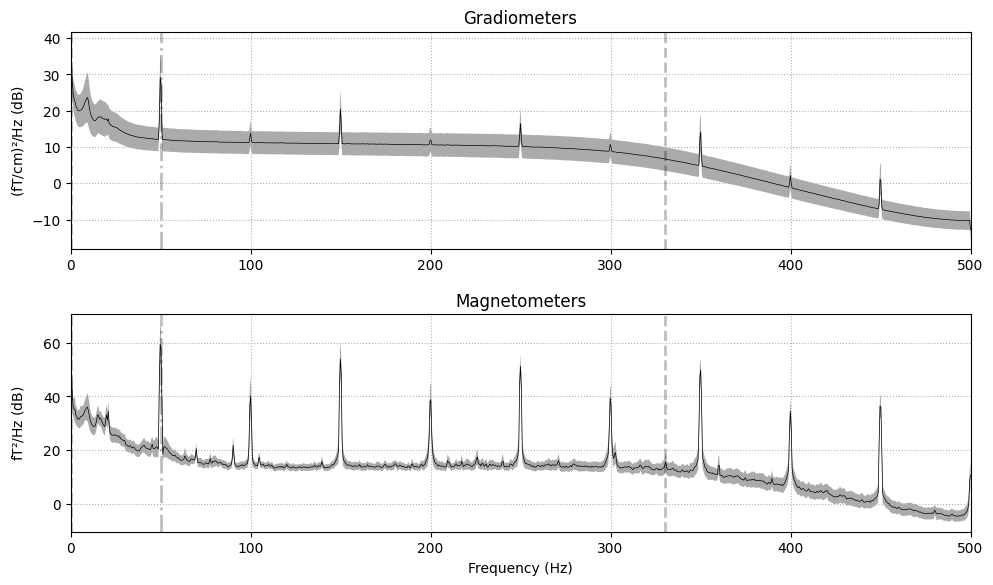

In [5]:
raw.plot_psd(average = True)

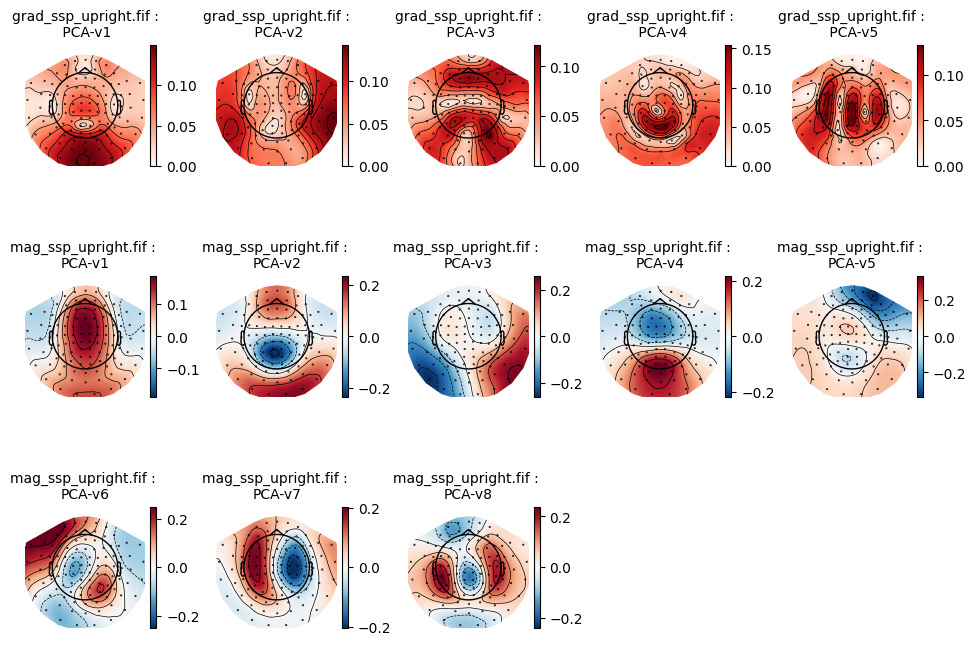

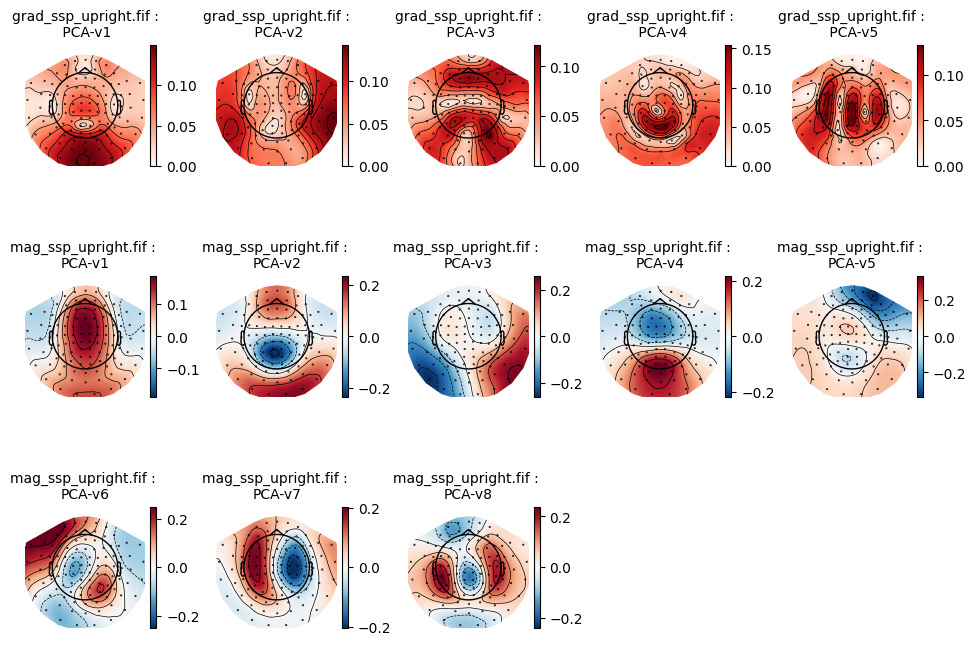

In [6]:
raw.plot_projs_topomap(colorbar=True)